In [ ]:
%pip install nba_api

In [ ]:
# Latest changes visible from the github profile here: https://github.com/vedranbrozovic/NBA_fantasy-tams
# Author: Vedran Brozovic (https://github.com/vedranbrozovic) with a lot of help of materials listed below

"""

github link:    https://github.com/vedranbrozovic/NBA_fantasy-tams

api link:       https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/endpoints/leaguegamefinder.md
                https://github.com/swar/nba_api/tree/master/docs/nba_api

code base link: https://github.com/liannewriting/data-science-project-from-scratch-youtube-nba/blob/main/main.py
                https://youtu.be/cSnM2PHVqYs

"""

In [1]:
# import libraries

from nba_api.stats.endpoints import leaguegamefinder
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
league_start= dt.date(2022,10,17)   #league start
league_end= dt.date.today()

# to get a stupid MM/DD/YYYY format to push the parameter through
league_start_str = league_start.strftime("%m/%d/%Y")
league_end_str = league_end.strftime("%m/%d/%Y")




In [3]:
gamefinder = leaguegamefinder.LeagueGameFinder(date_from_nullable=league_start_str, # start date
                                               date_to_nullable=league_end_str,     # end date
                                               league_id_nullable='00',
                                               )
# would be for specific date: date_from_nullable=game_date_str
games = gamefinder.get_data_frames()[0]

games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612747,LAL,Los Angeles Lakers,0022200095,2022-10-30,LAL vs. DEN,None,108,45,...,0.750,4,16,20,11,2,2,4,7,-1.8
1,22022,1610612743,DEN,Denver Nuggets,0022200095,2022-10-30,DEN @ LAL,None,108,44,...,0.778,5,18,23,12,1,3,5,7,1.4
2,22022,1610612744,GSW,Golden State Warriors,0022200091,2022-10-30,GSW @ DET,L,241,114,...,0.960,13,29,42,23,8,4,14,24,-11.4
3,22022,1610612765,DET,Detroit Pistons,0022200091,2022-10-30,DET vs. GSW,W,240,128,...,0.895,12,35,47,24,4,3,15,25,11.8
4,22022,1610612756,PHX,Phoenix Suns,0022200094,2022-10-30,PHX vs. HOU,None,120,68,...,0.769,7,14,21,18,6,4,9,14,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,22022,1610612757,POR,Portland Trail Blazers,0022200014,2022-10-19,POR @ SAC,W,239,115,...,0.788,11,33,44,20,11,2,11,17,7.0
186,22022,1610612747,LAL,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,241,109,...,0.760,9,39,48,23,12,4,21,18,-14.0
187,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,241,123,...,0.739,11,37,48,31,11,4,18,23,14.0
188,22022,1610612755,PHI,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,239,117,...,0.857,4,27,31,16,8,3,14,25,-9.0


In [4]:
unfinished = games[games.WL.isnull() == True]
print("These are unfinished games: ")

print("They will not be considered")
unfinished

These are unfinished games: 
They will not be considered


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612747,LAL,Los Angeles Lakers,0022200095,2022-10-30,LAL vs. DEN,None,108,45,...,0.750,4,16,20,11,2,2,4,7,-1.8
1,22022,1610612743,DEN,Denver Nuggets,0022200095,2022-10-30,DEN @ LAL,None,108,44,...,0.778,5,18,23,12,1,3,5,7,1.4
4,22022,1610612756,PHX,Phoenix Suns,0022200094,2022-10-30,PHX vs. HOU,None,120,68,...,0.769,7,14,21,18,6,4,9,14,9.0
5,22022,1610612745,HOU,Houston Rockets,0022200094,2022-10-30,HOU @ PHX,None,120,63,...,0.714,9,13,22,10,6,1,10,14,-9.0


In [5]:
games = games[games.WL.isnull() == False]

In [6]:
# Add additional information in separate columns from MATCHDAY

# Add a column about an opponent - always in matchup

opponent = games['MATCHUP'].str[-3:]
games['OPPONENT'] = opponent

# Is it a home or away game? > first set all to home then change those having @ to away
games['IS_HOME'] = 1
games.loc[games['MATCHUP'].str.contains('@'), 'IS_HOME'] = 0

# Add actual countable Wins
games['IS_WIN'] = 1
games.loc[games['WL'] == 'L', 'IS_WIN'] = 0

C:\Users\vbrozovi\AppData\Local\Temp\ipykernel_36584\3849726044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['OPPONENT'] = opponent
C:\Users\vbrozovi\AppData\Local\Temp\ipykernel_36584\3849726044.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['IS_HOME'] = 1
C:\Users\vbrozovi\AppData\Local\Temp\ipykernel_36584\3849726044.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [7]:
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,OPPONENT,IS_HOME,IS_WIN
2,22022,1610612744,GSW,Golden State Warriors,0022200091,2022-10-30,GSW @ DET,L,241,114,...,42,23,8,4,14,24,-11.4,DET,0,0
3,22022,1610612765,DET,Detroit Pistons,0022200091,2022-10-30,DET vs. GSW,W,240,128,...,47,24,4,3,15,25,11.8,GSW,1,1
6,22022,1610612750,MIN,Minnesota Timberwolves,0022200092,2022-10-30,MIN @ SAS,L,239,98,...,45,21,11,7,11,23,-15.8,SAS,0,0
7,22022,1610612759,SAS,San Antonio Spurs,0022200092,2022-10-30,SAS vs. MIN,W,240,107,...,52,27,6,7,19,21,18.2,MIN,1,1
8,22022,1610612746,LAC,LA Clippers,0022200088,2022-10-30,LAC vs. NOP,L,241,91,...,39,24,3,6,14,15,-21.0,NOP,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,22022,1610612757,POR,Portland Trail Blazers,0022200014,2022-10-19,POR @ SAC,W,239,115,...,44,20,11,2,11,17,7.0,SAC,0,1
186,22022,1610612747,LAL,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,241,109,...,48,23,12,4,21,18,-14.0,GSW,0,0
187,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,241,123,...,48,31,11,4,18,23,14.0,LAL,1,1
188,22022,1610612755,PHI,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,239,117,...,31,16,8,3,14,25,-9.0,BOS,0,0


In [8]:
teams = games.drop_duplicates(['TEAM_ID','TEAM_ABBREVIATION','TEAM_NAME'])[['TEAM_ID','TEAM_ABBREVIATION','TEAM_NAME']]
teams

,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME
2,1610612744,GSW,Golden State Warriors
3,1610612765,DET,Detroit Pistons
6,1610612750,MIN,Minnesota Timberwolves
7,1610612759,SAS,San Antonio Spurs
8,1610612746,LAC,LA Clippers
9,1610612740,NOP,New Orleans Pelicans
10,1610612752,NYK,New York Knicks
11,1610612739,CLE,Cleveland Cavaliers
12,1610612742,DAL,Dallas Mavericks
13,1610612753,ORL,Orlando Magic


In [9]:
# Now we're actually importing the team selection (probably I want to move this the very start later on)
# I used the drop duplicates to match it, could pull from static api

# For now, setup the .txt file with the same fields (add TEAM_OWNER & TEAM_PICK) and change the URL string to match it
url ='https://raw.githubusercontent.com/vedranbrozovic/NBA_fantasy-tams/main/Team_selection.txt'
team_selection = pd.read_csv(url,sep='\t')
team_selection


,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,TEAM_OWNER,TEAM_PICK
0,1610612745,HOU,Houston Rockets,Miran,10
1,1610612761,TOR,Toronto Raptors,Miran,2
2,1610612763,MEM,Memphis Grizzlies,Miran,3
3,1610612765,DET,Detroit Pistons,Miran,8
4,1610612755,PHI,Philadelphia 76ers,Miran,1
5,1610612754,IND,Indiana Pacers,Miran,9
6,1610612737,ATL,Atlanta Hawks,Miran,6
7,1610612750,MIN,Minnesota Timberwolves,Miran,5
8,1610612756,PHX,Phoenix Suns,Miran,4
9,1610612752,NYK,New York Knicks,Miran,7


In [10]:
# Add info on the team owner & pick number to the games dataframe
team_selection_df = team_selection[['TEAM_ID','TEAM_OWNER','TEAM_PICK']]

games = pd.merge(games, team_selection_df, on=["TEAM_ID"])



In [11]:
# Add info on the owner of opposing team
opp_selection = team_selection[['TEAM_OWNER','TEAM_ABBREVIATION']]
opp_selection.columns = ['OPPOSING_OWNER','OPPONENT']
games = pd.merge(games, opp_selection ,on=["OPPONENT"])
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,BLK,TOV,PF,PLUS_MINUS,OPPONENT,IS_HOME,IS_WIN,TEAM_OWNER,TEAM_PICK,OPPOSING_OWNER
0,22022,1610612744,GSW,Golden State Warriors,0022200091,2022-10-30,GSW @ DET,L,241,114,...,4,14,24,-11.4,DET,0,0,Tata,2,Miran
1,22022,1610612752,NYK,New York Knicks,0022200023,2022-10-21,NYK vs. DET,W,239,130,...,6,12,26,24.0,DET,1,1,Miran,7,Miran
2,22022,1610612753,ORL,Orlando Magic,0022200003,2022-10-19,ORL @ DET,L,240,109,...,5,18,23,-4.0,DET,0,0,Tata,6,Miran
3,22022,1610612764,WAS,Washington Wizards,0022200052,2022-10-25,WAS vs. DET,W,241,120,...,7,11,20,21.0,DET,1,1,Tata,8,Miran
4,22022,1610612737,ATL,Atlanta Hawks,0022200070,2022-10-28,ATL @ DET,W,241,136,...,8,6,26,24.0,DET,0,1,Miran,6,Miran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,22022,1610612762,UTA,Utah Jazz,0022200048,2022-10-24,UTA @ HOU,L,239,108,...,10,20,27,-6.0,HOU,0,0,Vedran,9,Miran
182,22022,1610612763,MEM,Memphis Grizzlies,0022200024,2022-10-21,MEM @ HOU,W,240,129,...,10,12,20,7.0,HOU,0,1,Miran,3,Miran
183,22022,1610612737,ATL,Atlanta Hawks,0022200005,2022-10-19,ATL vs. HOU,W,240,117,...,5,9,18,10.0,HOU,1,1,Miran,6,Miran
184,22022,1610612749,MIL,Milwaukee Bucks,0022200033,2022-10-22,MIL vs. HOU,W,241,125,...,10,16,22,20.0,HOU,1,1,Vedran,1,Miran


In [12]:
# Add column to know if the game is against own team
games['IS_NOT_AGAINST_OWN'] = 1
games.loc[(games['TEAM_OWNER'] == games['OPPOSING_OWNER']),'IS_NOT_AGAINST_OWN']=0

games['IS_AGAINST_OWN'] = 0
games.loc[(games['TEAM_OWNER'] == games['OPPOSING_OWNER']),'IS_AGAINST_OWN']=1



games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,PF,PLUS_MINUS,OPPONENT,IS_HOME,IS_WIN,TEAM_OWNER,TEAM_PICK,OPPOSING_OWNER,IS_NOT_AGAINST_OWN,IS_AGAINST_OWN
0,22022,1610612744,GSW,Golden State Warriors,0022200091,2022-10-30,GSW @ DET,L,241,114,...,24,-11.4,DET,0,0,Tata,2,Miran,1,0
1,22022,1610612752,NYK,New York Knicks,0022200023,2022-10-21,NYK vs. DET,W,239,130,...,26,24.0,DET,1,1,Miran,7,Miran,0,1
2,22022,1610612753,ORL,Orlando Magic,0022200003,2022-10-19,ORL @ DET,L,240,109,...,23,-4.0,DET,0,0,Tata,6,Miran,1,0
3,22022,1610612764,WAS,Washington Wizards,0022200052,2022-10-25,WAS vs. DET,W,241,120,...,20,21.0,DET,1,1,Tata,8,Miran,1,0
4,22022,1610612737,ATL,Atlanta Hawks,0022200070,2022-10-28,ATL @ DET,W,241,136,...,26,24.0,DET,0,1,Miran,6,Miran,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,22022,1610612762,UTA,Utah Jazz,0022200048,2022-10-24,UTA @ HOU,L,239,108,...,27,-6.0,HOU,0,0,Vedran,9,Miran,1,0
182,22022,1610612763,MEM,Memphis Grizzlies,0022200024,2022-10-21,MEM @ HOU,W,240,129,...,20,7.0,HOU,0,1,Miran,3,Miran,0,1
183,22022,1610612737,ATL,Atlanta Hawks,0022200005,2022-10-19,ATL vs. HOU,W,240,117,...,18,10.0,HOU,1,1,Miran,6,Miran,0,1
184,22022,1610612749,MIL,Milwaukee Bucks,0022200033,2022-10-22,MIL vs. HOU,W,241,125,...,22,20.0,HOU,1,1,Vedran,1,Miran,1,0


In [13]:
# actually calculate the points!
# Doesn't address the Playoff game / Championship



bodovi = games.groupby(by=['TEAM_OWNER'])['IS_WIN'].sum()
# bodovi = bodovi.sort_values(ascending=False)

print("Ovo je trenutno stanje s bodovima na daatum " + league_end_str)
print(bodovi)
# bodovi = bodovi.sort_values(by=['IS_WIN'], ascending=False)



Ovo je trenutno stanje s bodovima na daatum 10/30/2022
TEAM_OWNER
Miran     31
Tata      25
Vedran    37
Name: IS_WIN, dtype: int64


In [14]:
 # Next steps: Play with data
# Total possible points, total games, total games vs. own teams, total ratios for all pairs...

In [15]:
print("Total number of games played:")

ukupno_tekma = games.groupby(by=['TEAM_OWNER'])['GAME_ID'].count()
# ukupno_tekma = ukupno_tekma.sort_values(ascending=False)

ukupno_tekma

Total number of games played:


TEAM_OWNER
Miran     63
Tata      62
Vedran    61
Name: GAME_ID, dtype: int64

In [16]:
print("Total possible points (excl. games vs. own teams):")

potencijalno_bodovi = games.groupby(by=['TEAM_OWNER'])['IS_NOT_AGAINST_OWN'].sum()
# potencijalno_bodovi  = potencijalno_bodovi.sort_values(ascending=False)

potencijalno_bodovi

Total possible points (excl. games vs. own teams):


TEAM_OWNER
Miran     43
Tata      36
Vedran    41
Name: IS_NOT_AGAINST_OWN, dtype: int64

In [26]:
print("Minimum number of points (just the games vs. own teams)")

min_bodovi = games.groupby(by=['TEAM_OWNER'])['IS_AGAINST_OWN'].sum()/2
# min_bodovi  = min_bodovi.sort_values(ascending=False)
min_bodovi


Minimum number of points (just the games vs. own teams)


TEAM_OWNER
Miran     10.0
Tata      13.0
Vedran    10.0
Name: IS_AGAINST_OWN, dtype: float64

In [27]:
# Print the results


print("Ovo je trenutno stanje s bodovima na daatum " + league_end_str)
print(bodovi)
print()

print("Total number of games played:")
print(ukupno_tekma)
print()

print("Total possible points (excl. games vs. own teams):")
print(potencijalno_bodovi)
print()

print("Minimum number of points (just the games vs. own teams)")
print(min_bodovi)

Ovo je trenutno stanje s bodovima na daatum 10/30/2022
TEAM_OWNER
Miran     31
Tata      25
Vedran    37
Name: IS_WIN, dtype: int64

Total number of games played:
TEAM_OWNER
Miran     63
Tata      62
Vedran    61
Name: GAME_ID, dtype: int64

Total possible points (excl. games vs. own teams):
TEAM_OWNER
Miran     43
Tata      36
Vedran    41
Name: IS_NOT_AGAINST_OWN, dtype: int64

Minimum number of points (just the games vs. own teams)
TEAM_OWNER
Miran     10.0
Tata      13.0
Vedran    10.0
Name: IS_AGAINST_OWN, dtype: float64


In [19]:
# Visualize minimum, maximum and actual point

# import numpy as np > already have it



In [28]:
# Build a dataframe with all the aggregate details
# This one for just the main graphing (who's winning?)

standings = pd.concat([min_bodovi, bodovi,potencijalno_bodovi,ukupno_tekma], axis=1).reset_index()
standings.columns=([['TEAM_OWNER','min_bodovi','bodovi','max_bodovi','ukupno_tekme']])
standings

,TEAM_OWNER,min_bodovi,bodovi,max_bodovi,ukupno_tekme
0,Miran,10.0,31,43,63
1,Tata,13.0,25,36,62
2,Vedran,10.0,37,41,61


  TEAM_OWNER min_bodovi bodovi max_bodovi ukupno_tekme
0      Miran       10.0     31         43           63
1       Tata       13.0     25         36           62
2     Vedran       10.0     37         41           61


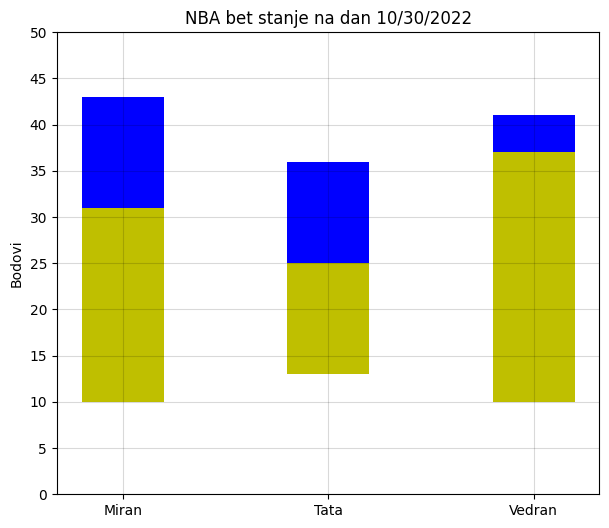

In [29]:
N = standings['TEAM_OWNER'].nunique()[0]

bar_max_bodovi = standings['max_bodovi'].squeeze()
bar_min_bodovi = standings['min_bodovi'].squeeze()
bar_bodovi = standings['bodovi'].squeeze()
bar_owner = standings['TEAM_OWNER'].squeeze()

# girls =  bodovi
# trans = potencijalno_bodovi

# boyStd = (2, 3, 4)
# girlStd = (3, 5, 2)


ind = np.arange(N)
width = 0.4


fig = plt.subplots(figsize =(7, 6))
p1 = plt.bar(ind, bar_max_bodovi-bar_min_bodovi, width, alpha=1, bottom=bar_min_bodovi,color='b')
p2 = plt.bar(ind, bar_bodovi-bar_min_bodovi, width, bottom=bar_min_bodovi,alpha=1, color ='y')
# p3 = plt.bar(ind,min_bodovi,width, alpha=1)

plt.ylabel('Bodovi')
plt.title('NBA bet stanje na dan ' + league_end_str)

plt.xticks(ind, bar_owner)
plt.yticks(np.arange(0, max(bar_max_bodovi)+9, 5))
plt.grid(color='0',alpha=0.15)

print(standings)
# tbl = plt.subplots()
# print(standings.sort_values(by=['bodovi'], ascending=False))
plt.show()

In [22]:

games[(games.TEAM_OWNER=="Tata") & games.WL.isnull() == True]


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,PF,PLUS_MINUS,OPPONENT,IS_HOME,IS_WIN,TEAM_OWNER,TEAM_PICK,OPPOSING_OWNER,IS_NOT_AGAINST_OWN,IS_AGAINST_OWN


In [23]:
games[(games.TEAM_OWNER == "Tata") & (games.IS_AGAINST_OWN==1)]

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,PF,PLUS_MINUS,OPPONENT,IS_HOME,IS_WIN,TEAM_OWNER,TEAM_PICK,OPPOSING_OWNER,IS_NOT_AGAINST_OWN,IS_AGAINST_OWN
7,22022,1610612744,GSW,Golden State Warriors,0022200082,2022-10-29,GSW @ CHA,L,266,113,...,31,-7.0,CHA,0,0,Tata,2,Tata,0,1
9,22022,1610612740,NOP,New Orleans Pelicans,0022200017,2022-10-21,NOP @ CHA,W,240,124,...,14,12.0,CHA,0,1,Tata,5,Tata,0,1
11,22022,1610612753,ORL,Orlando Magic,0022200071,2022-10-28,ORL vs. CHA,W,241,113,...,22,20.0,CHA,1,1,Tata,6,Tata,0,1
13,22022,1610612744,GSW,Golden State Warriors,0022200068,2022-10-27,GSW vs. MIA,W,240,123,...,13,13.0,MIA,1,1,Tata,2,Tata,0,1
15,22022,1610612758,SAC,Sacramento Kings,0022200081,2022-10-29,SAC vs. MIA,W,240,119,...,29,6.0,MIA,1,1,Tata,10,Tata,0,1
25,22022,1610612744,GSW,Golden State Warriors,0022200042,2022-10-23,GSW vs. SAC,W,240,130,...,21,5.0,SAC,1,1,Tata,2,Tata,0,1
26,22022,1610612746,LAC,LA Clippers,0022200036,2022-10-22,LAC @ SAC,W,241,111,...,21,2.0,SAC,0,1,Tata,3,Tata,0,1
27,22022,1610612748,MIA,Miami Heat,0022200081,2022-10-29,MIA @ SAC,L,241,113,...,25,-6.0,SAC,0,0,Tata,4,Tata,0,1
42,22022,1610612748,MIA,Miami Heat,0022200068,2022-10-27,MIA @ GSW,L,240,110,...,15,-13.0,GSW,0,0,Tata,4,Tata,0,1
43,22022,1610612758,SAC,Sacramento Kings,0022200042,2022-10-23,SAC @ GSW,L,240,125,...,29,-5.0,GSW,0,0,Tata,10,Tata,0,1
